In [11]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\dataWithDupeQty.csv")

# Displaying the first few rows of the CSV file
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,1,1/1/2023,7:06:11,1,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2,1/1/2023,7:08:56,1,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
4,3,1/1/2023,7:14:04,1,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


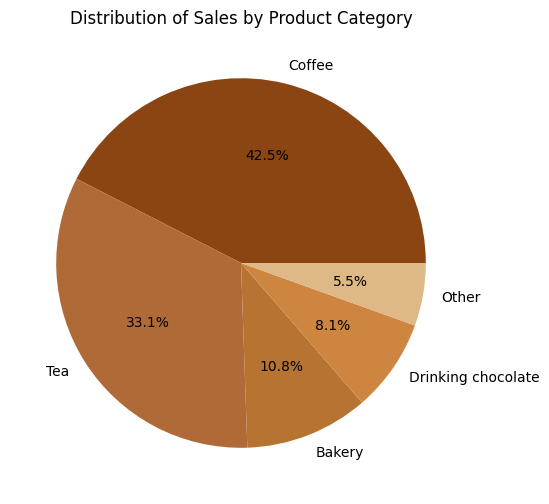

In [12]:

# Counting the sales in each category
category_distribution = df['product_category'].value_counts(normalize=True)

# Generate category mapping based on percentage of sales
threshold = 0.08  # Adjust threshold as needed
category_mapping = {}
other_categories = []
for category, percentage in category_distribution.items():
    if percentage >= threshold:
        category_mapping[category.lower()] = category.capitalize()
    else:
        other_categories.append(category)        

# Function to categorize products into broader categories
def categorize_product(product):
    product_lower = product.lower()
    for keyword, category in category_mapping.items():
        if keyword in product_lower:
            return category
    return 'Other'

df['broad_category'] = df['product_category'].apply(categorize_product)

# Counting the sales in each broad category
broad_category_distribution = df['broad_category'].value_counts()

# Define a custom color palette with shades of light brown
colors = ['#8B4513','#AF6A38', '#B67331', '#CD853F', '#DEB887']  # Adjust color map as needed

plt.figure(figsize=(8, 6))

# Plotting the pie chart with the custom color palette
broad_category_distribution.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Sales by Product Category')
plt.ylabel('')
plt.show()


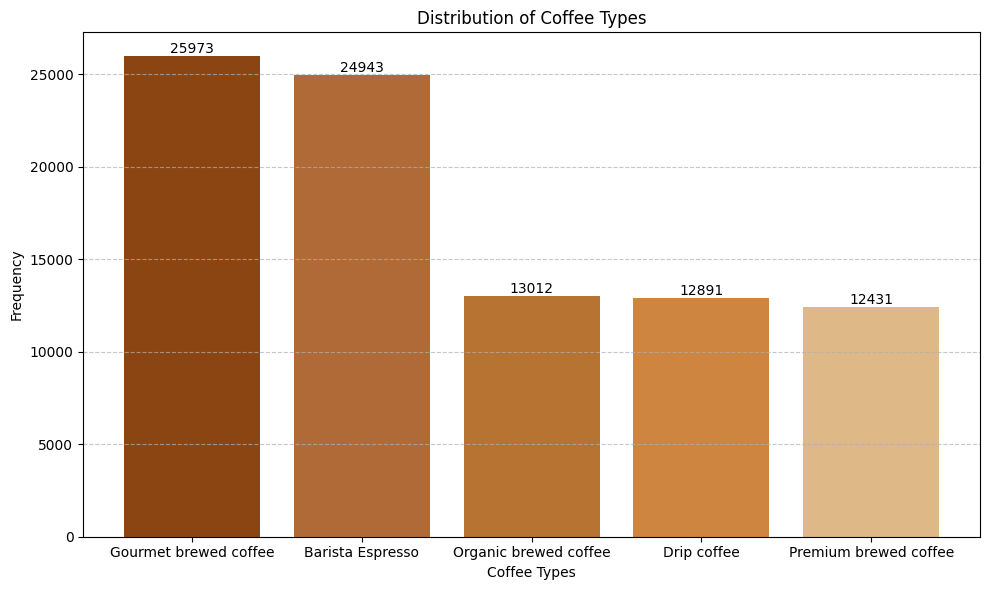

In [13]:

coffee_data = df[df['product_category'] == 'Coffee']
coffee_types = coffee_data['product_type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(coffee_types.index, coffee_types, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    
plt.title('Distribution of Coffee Types')
plt.xlabel('Coffee Types')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


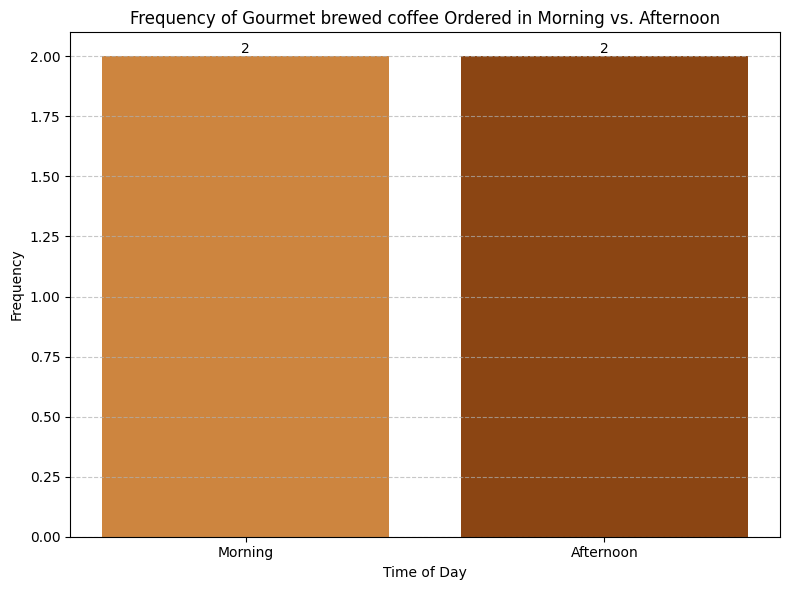

In [14]:
import pandas as pd

# Sample data (replace this with your actual DataFrame)
data = pd.DataFrame({
    'transaction_time': ["7:06:11", "14:30:45", "18:45:20", "9:12:05", "16:20:30"],
    'product_type': ['Gourmet brewed coffee', 'Gourmet brewed coffee', 'Regular coffee', 'Gourmet brewed coffee', 'Gourmet brewed coffee']
})

# Convert transaction_time to time format
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time

# Extract hour from transaction_time
data['hour'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.hour

# Function to categorize time of the day
def time_category(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening/Night'

# Applying time_category function to create a new column
data['time_of_day'] = data['hour'].apply(time_category)

# Choosing the specific product_type
product_type_of_interest = 'Gourmet brewed coffee'

# Filtering the DataFrame for transactions containing the product type of interest
product_type_data = data[data['product_type'] == product_type_of_interest]

# Group by time_of_day and count the occurrences of the product type
product_type_counts = product_type_data.groupby('time_of_day').size().reset_index(name='counts')

# Reversing the order of the DataFrame
product_type_counts = product_type_counts[::-1]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

colors = ['#CD853F', '#8B4513', '#AF6A38']  # Adjust color map as needed

bars = plt.bar(product_type_counts['time_of_day'], product_type_counts['counts'], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title(f'Frequency of {product_type_of_interest} Ordered in Morning vs. Afternoon')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


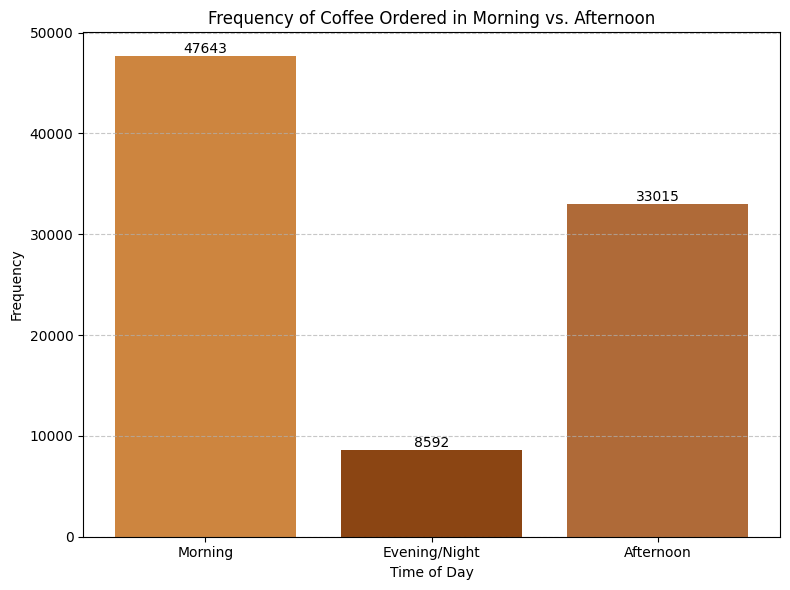

In [15]:
# Convert transaction_time to datetime format
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

# Extract hour from transaction_time
df['hour'] = df['transaction_time'].dt.hour

# Function to categorize time of the day
def time_category(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening/Night'

# Applying time_category function to create a new column
df['time_of_day'] = df['hour'].apply(time_category)

# Filtering the DataFrame for transactions containing coffee products
coffee_data = df[df['product_category'] == 'Coffee']

# Group by time_of_day and count the occurrences of coffee products
coffee_counts = coffee_data.groupby('time_of_day').size().reset_index(name='counts')

# Reversing the order of the DataFrame
coffee_counts = coffee_counts[::-1]

plt.figure(figsize=(8, 6))

colors = ['#CD853F', '#8B4513', '#AF6A38']  # Adjust color map as needed

bars = plt.bar(coffee_counts['time_of_day'], coffee_counts['counts'], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Frequency of Coffee Ordered in Morning vs. Afternoon')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


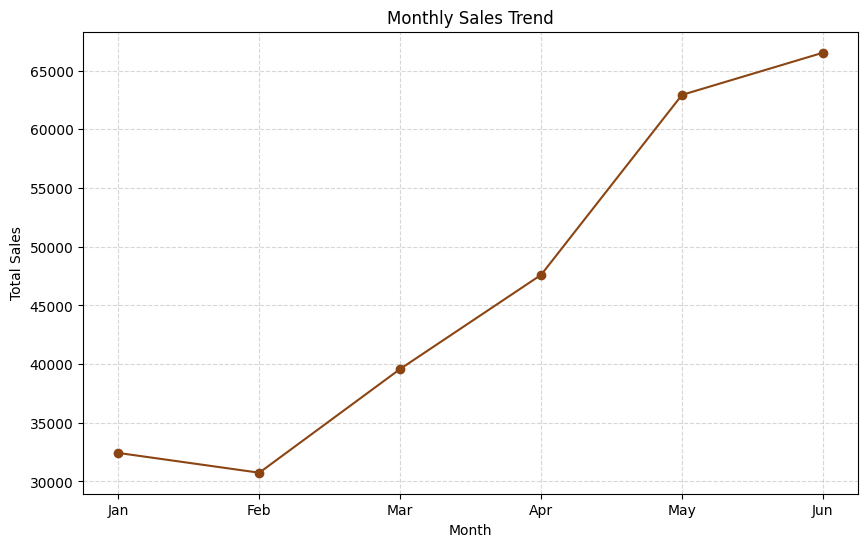

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['transaction_date'] contains the transaction date and df['transaction_qty'] contains the quantity sold
plt.figure(figsize=(10, 6))

# Convert transaction_date to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month from transaction_date
df['Month'] = df['transaction_date'].dt.month

# Calculate monthly sales for the first 6 months
monthly_sales = df[df['Month'] <= 6].groupby('Month')['transaction_qty'].sum()

# Plotting the line chart
monthly_sales.plot(kind='line', marker='o', color='#8B4513')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Customizing x-axis ticks to display month names for the first 6 months
plt.xticks(range(1, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


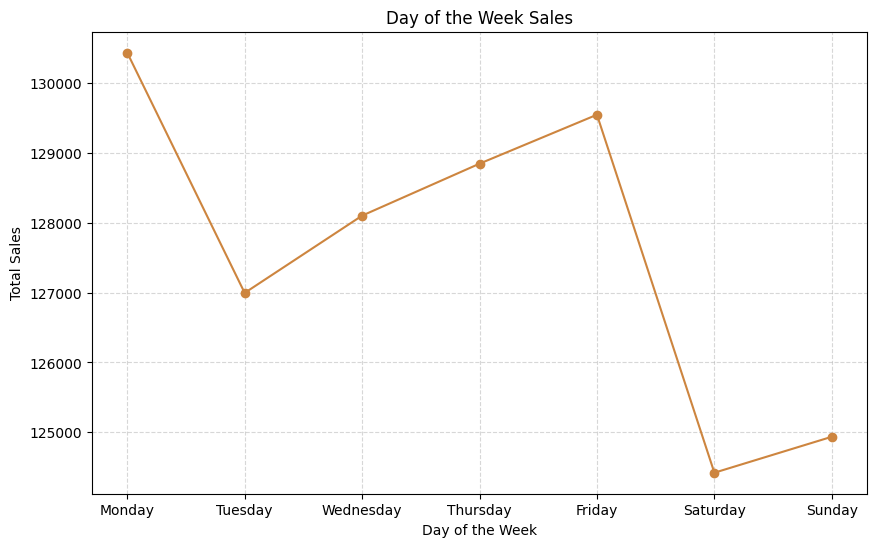

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['transaction_date'] contains the transaction date, df['transaction_qty'] contains quantity sold, and df['unit_price'] contains unit price
plt.figure(figsize=(10, 6))

# Extract the day of the week from transaction_date
df['Day Name'] = pd.to_datetime(df['transaction_date']).dt.day_name()

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate total sales for each day of the week
df['Total Sales'] = df['transaction_qty'] * df['unit_price']
day_sales = df.groupby('Day Name')['Total Sales'].sum().reindex(day_order)

# Plotting the line plot
day_sales.plot(kind='line', marker='o', color='#CD853F')

plt.title('Day of the Week Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


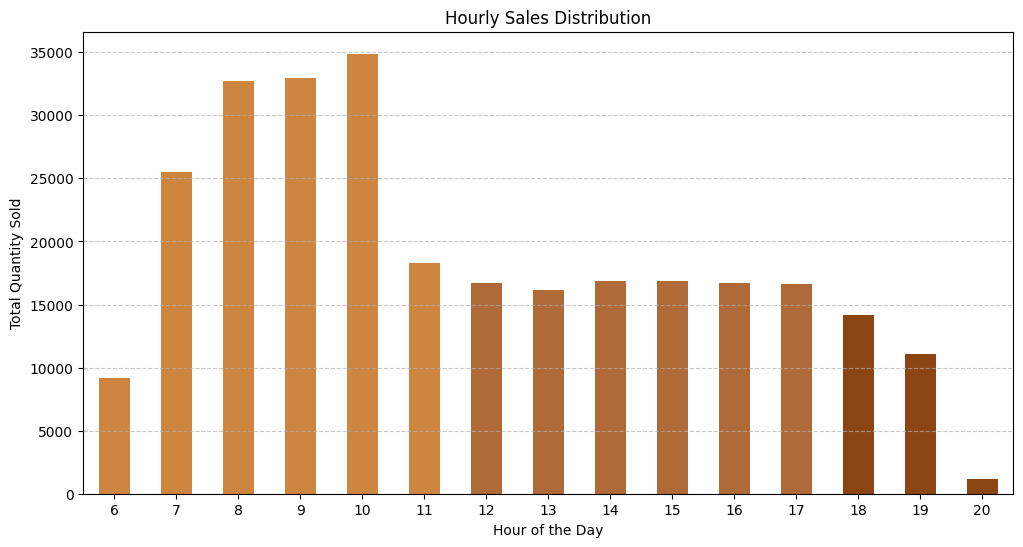

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df['transaction_time'] contains the time of the transaction and df['transaction_qty'] contains the quantity sold
plt.figure(figsize=(12, 6))

# Extracting hour from transaction_time
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['Hour'] = df['transaction_time'].dt.hour

# Calculate total sales for each hour
hourly_sales = df.groupby('Hour')['transaction_qty'].sum()

colors = ['#AF6A38' if (hour >= 6 and hour < 12) else '#8B4513' if (hour >= 12 and hour < 18) else '#CD853F' for hour in range(24)]

# Plotting the bar plot
hourly_sales.plot(kind='bar', color=colors)
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
